In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
timestamp = "2022_1025_1700_20"

In [81]:
train_state_dict = torch.load(f"debug/{timestamp}.train.debug")

In [55]:
preactivation_dict = train_state_dict['preactivation']

torch.Size([20, 8, 176, 192])


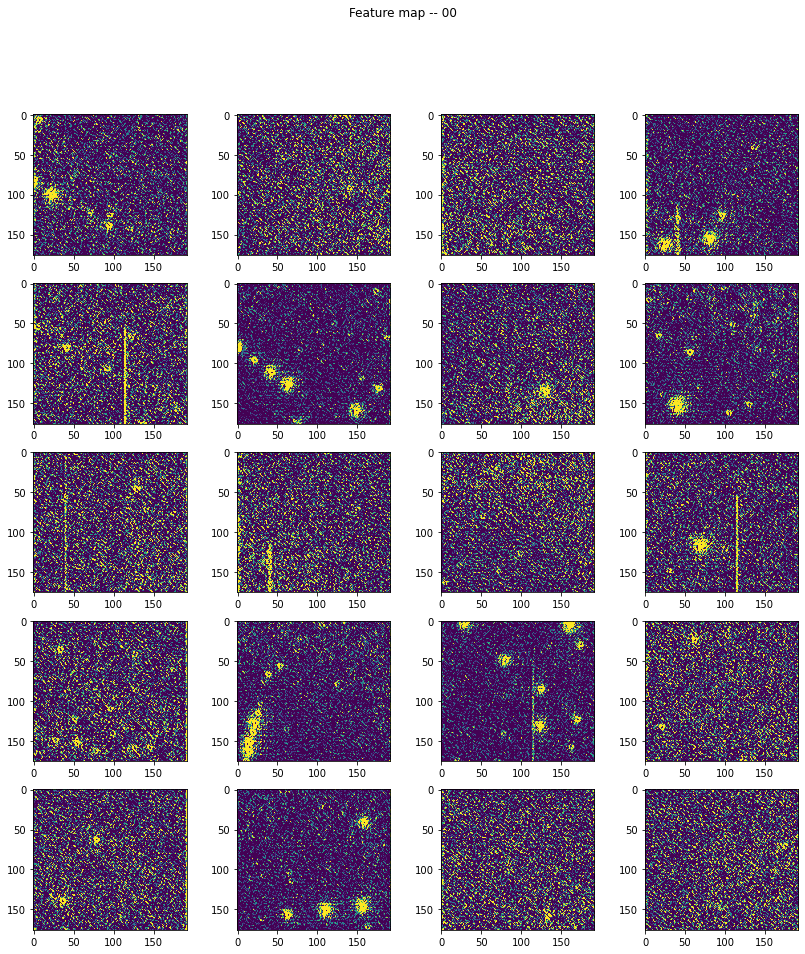

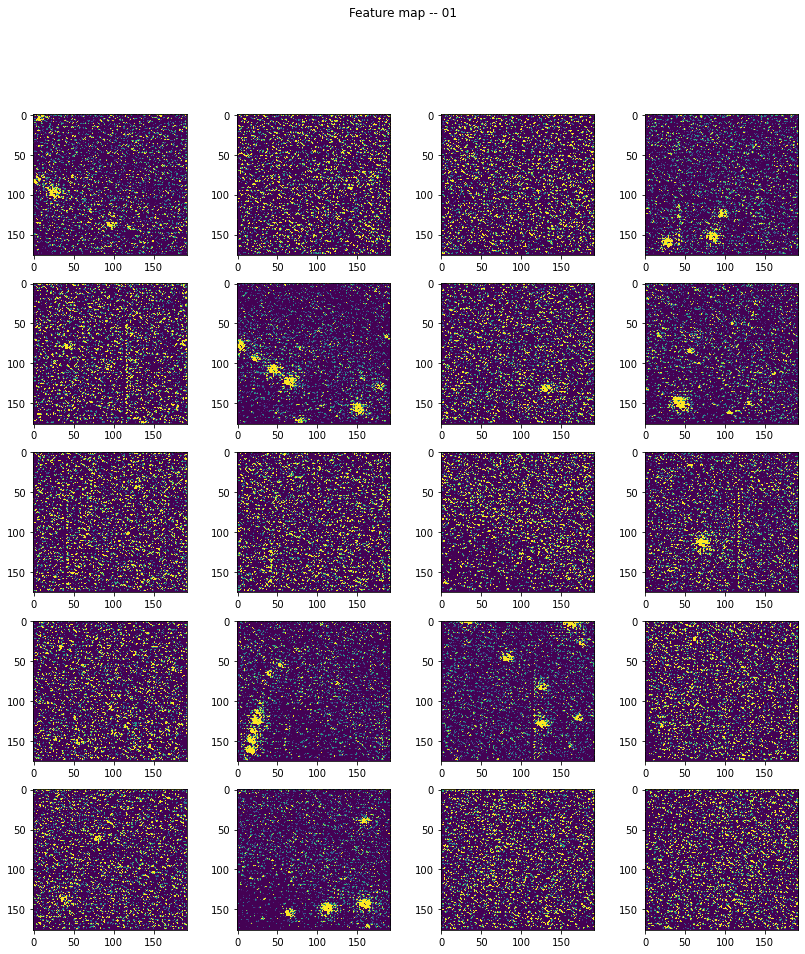

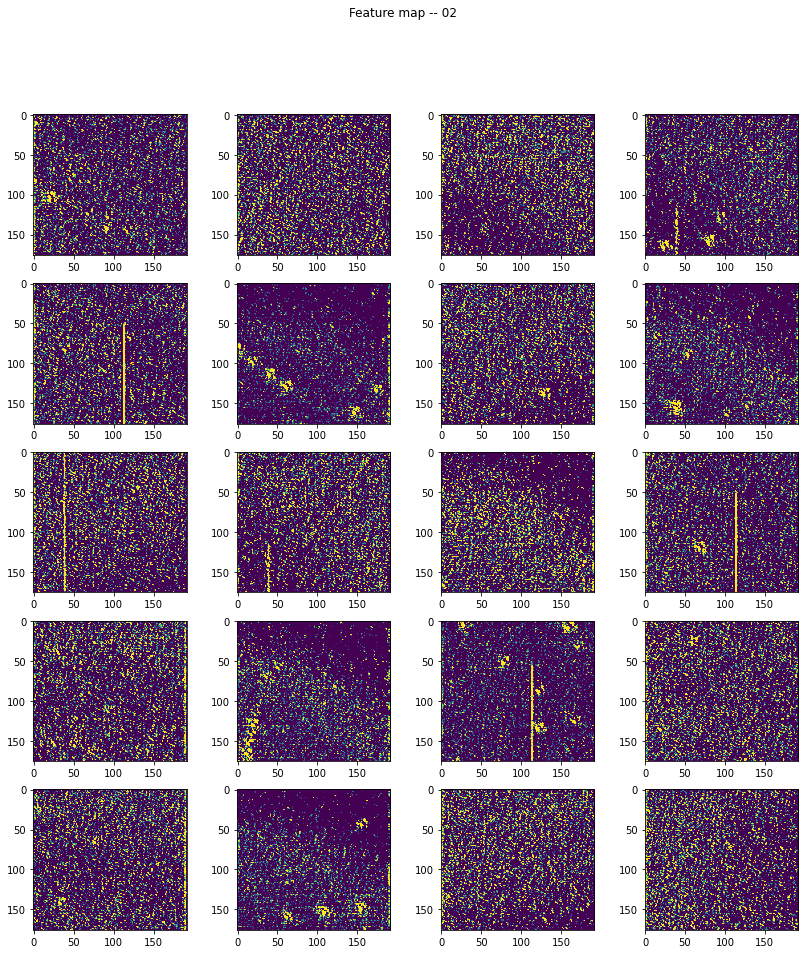

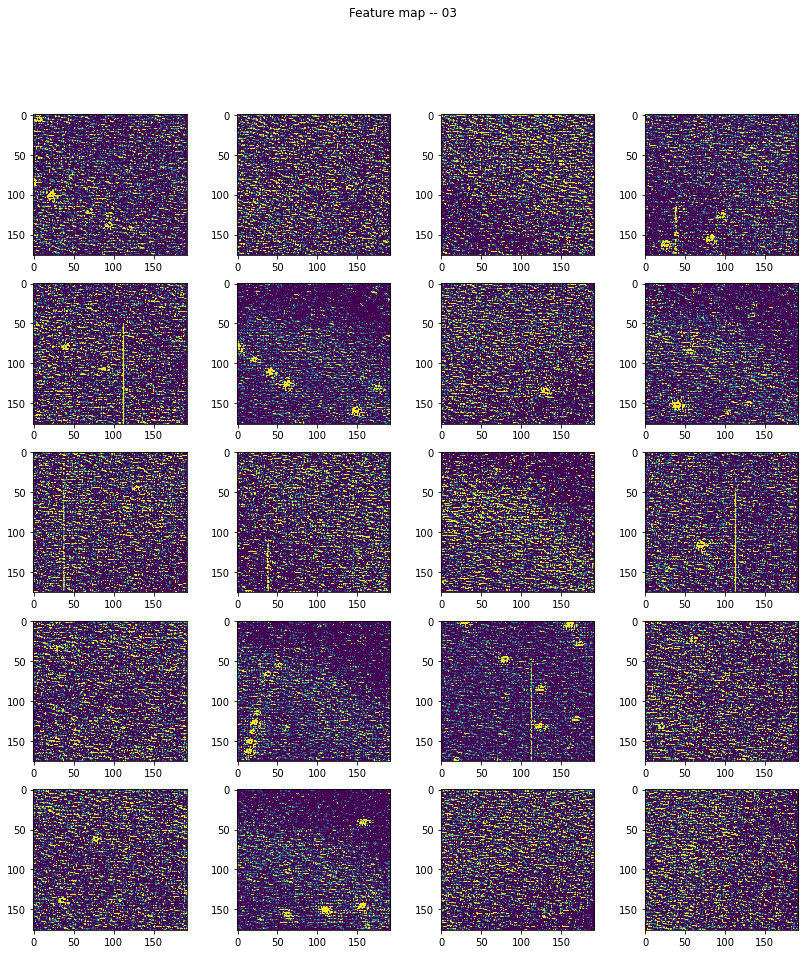

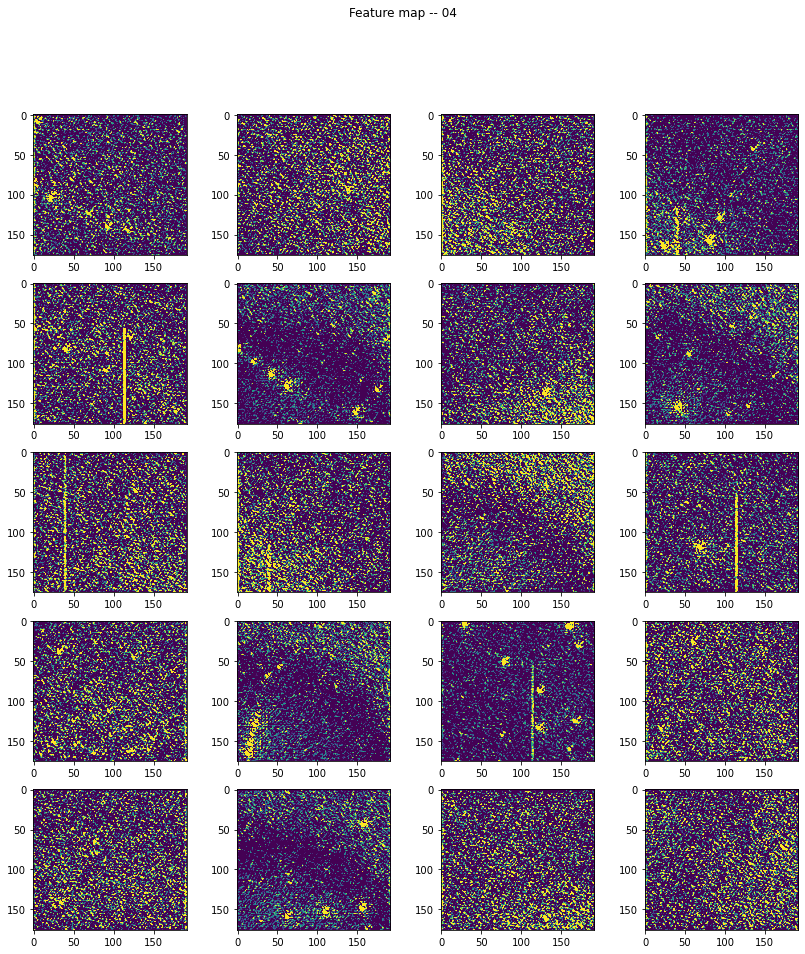

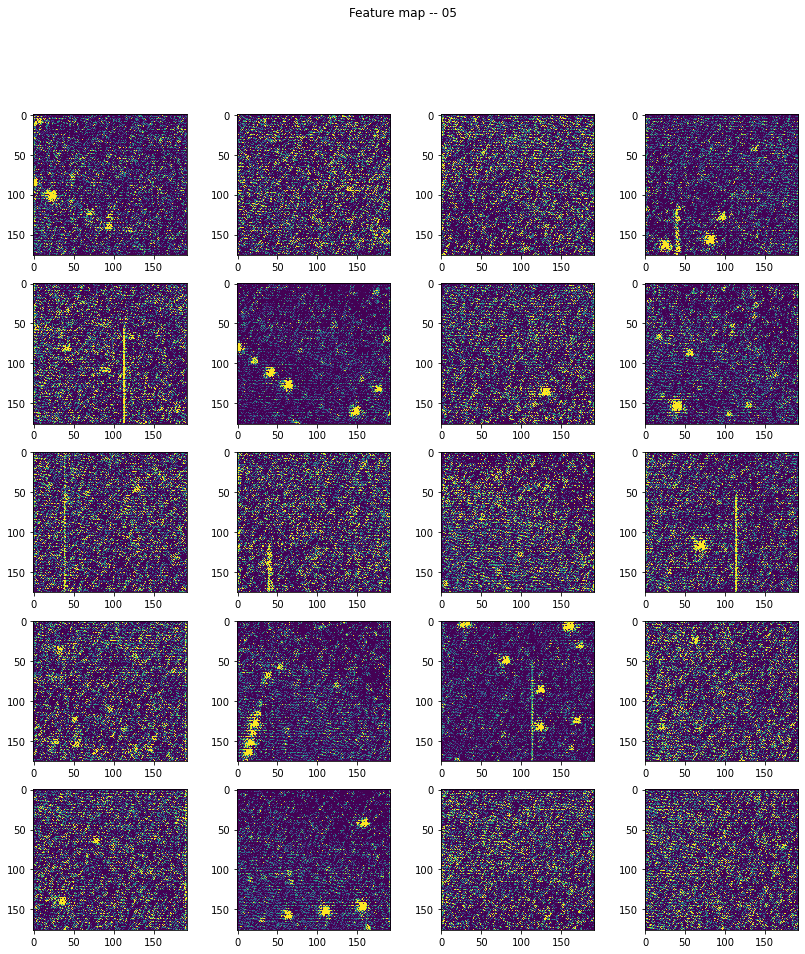

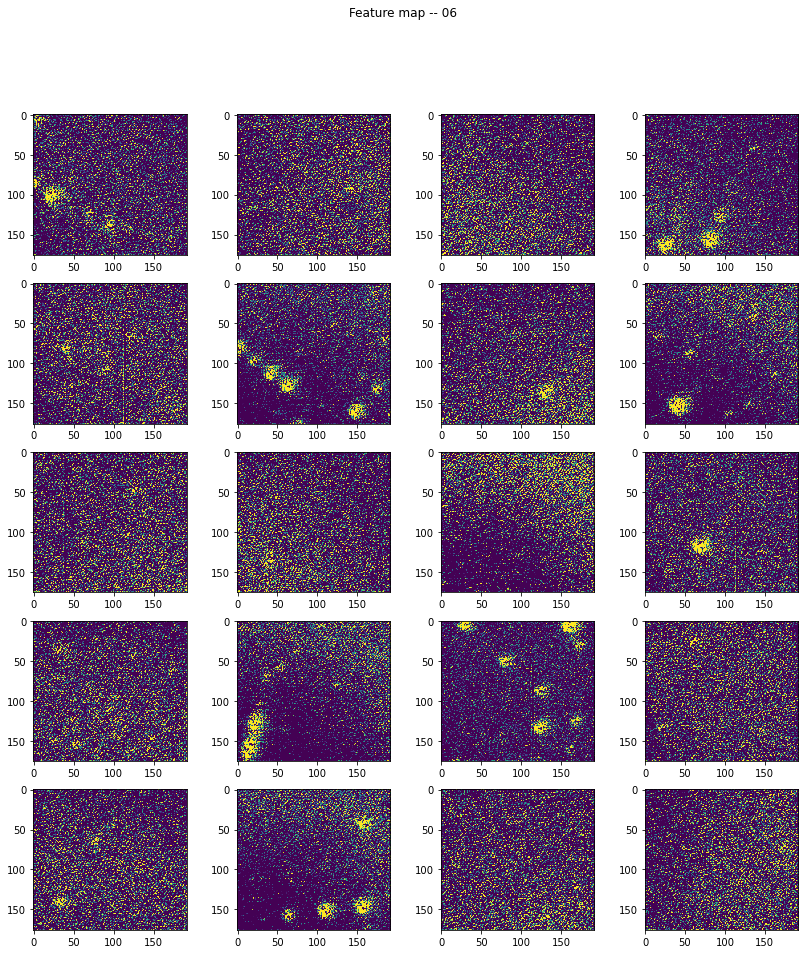

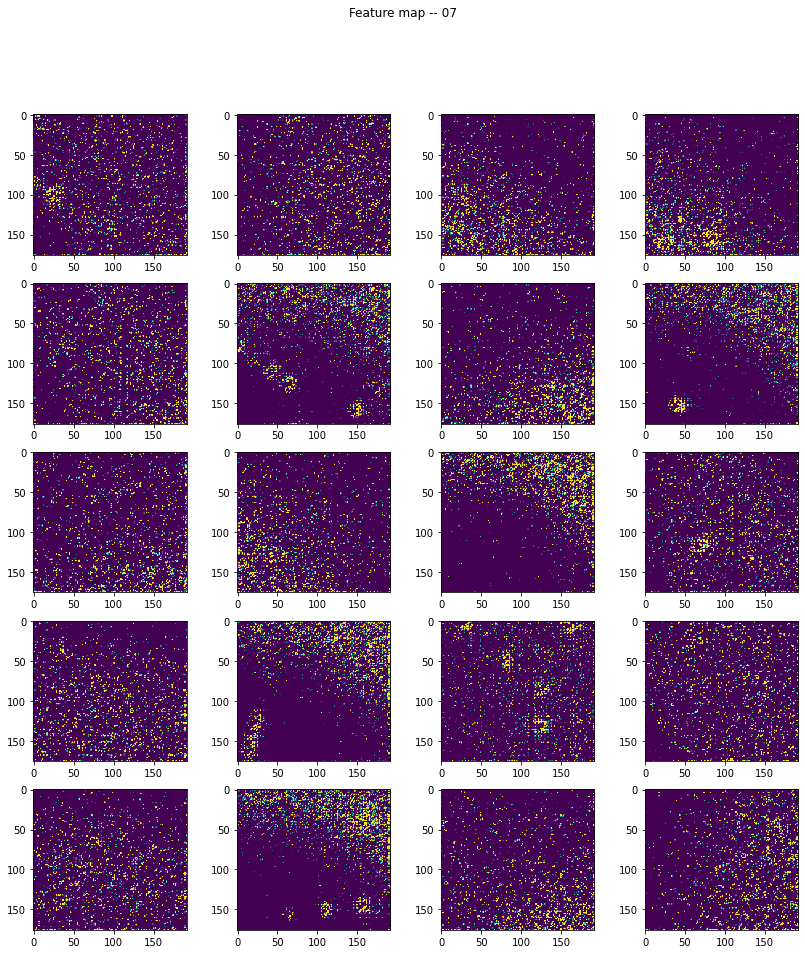

In [56]:
preamap = preactivation_dict['final_conv']['module.method.final_conv']
preamap
print(preamap[0].data.shape)
data = preamap[0].cpu().detach().numpy()
## data = amap.sigmoid().cpu().detach().numpy()
## data[data < 1-1e-2] = 0

ncols = 4
nrows = 5

for channel in range(data.shape[1]):
    fig   = plt.figure(figsize = (14, 15))
    gspec = fig.add_gridspec( nrows, ncols,
                              #width_ratios  = [1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/20],
                              #height_ratios = [1/2, 1/2], 
                            )
    ax_list = [ fig.add_subplot(gspec[j, i], aspect = 1) for i in range(ncols) for j in range(nrows)]
    for i, ax in enumerate(ax_list):
        img = data[i,channel,]
        factor = 1
        vmin = img.mean()
        vmax = vmin + factor * img.std()
        im = ax.imshow(img, vmin = vmin, vmax = vmax)
        #im = ax.imshow(img, vmin = 0, vmax = 1)
        im.set_clim(vmin, vmax)
        ## print(vmin, vmax)
        #im.set_clim(0, 1)
    fig.suptitle(f"Feature map -- {channel:02d}")

In [33]:
activation_dict = train_state_dict['activation']

torch.Size([20, 1, 176, 192])


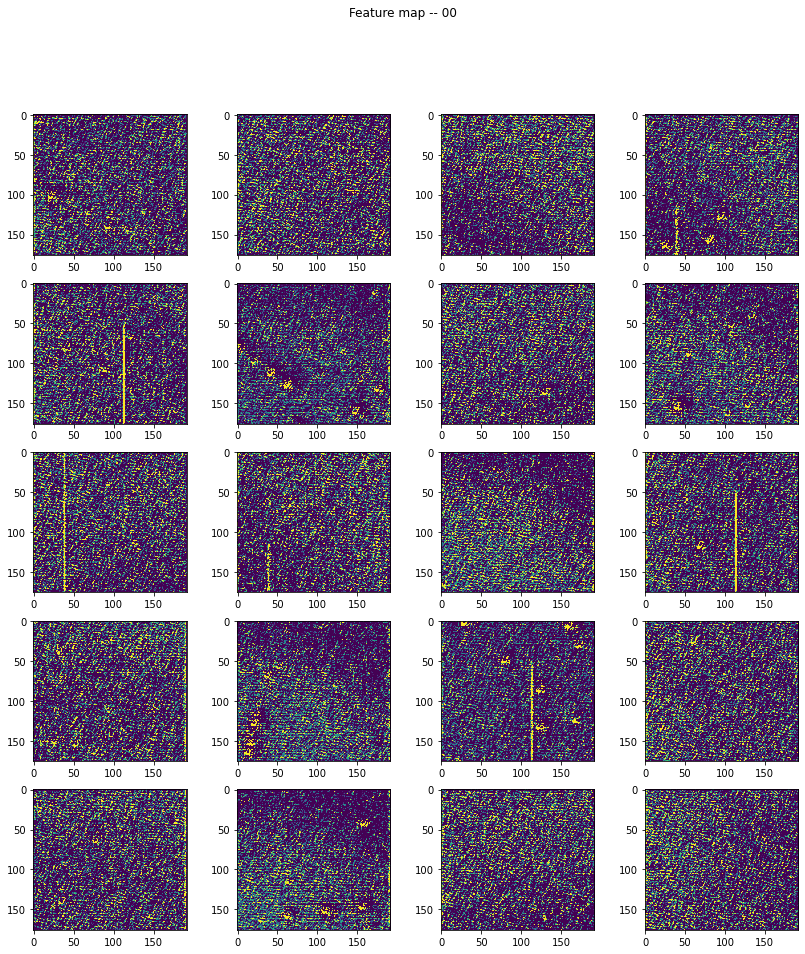

In [57]:
amap = activation_dict['final_conv']['module.method.final_conv']
amap
print(amap.shape)
##data = amap.cpu().detach().numpy()
data = amap.sigmoid().cpu().detach().numpy()
## data[data < 1-1e-1] = 0

ncols = 4
nrows = 5

for channel in range(data.shape[1]):
    fig   = plt.figure(figsize = (14, 15))
    gspec = fig.add_gridspec( nrows, ncols,
                              #width_ratios  = [1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/20],
                              #height_ratios = [1/2, 1/2], 
                            )
    ax_list = [ fig.add_subplot(gspec[j, i], aspect = 1) for i in range(ncols) for j in range(nrows)]
    for i, ax in enumerate(ax_list):
        img = data[i,channel,]
        factor = 1
        vmin = img.mean()
        vmax = vmin + factor * img.std()
        im = ax.imshow(img, vmin = vmin, vmax = vmax)
        #im = ax.imshow(img, vmin = 0, vmax = 1)
        im.set_clim(vmin, vmax)
        ## print(vmin, vmax)
        #im.set_clim(0, 1)
    fig.suptitle(f"Feature map -- {channel:02d}")

In [82]:
model_named_parameters = train_state_dict['model_named_parameters']

layer 00 (method.down_conv.0.first.weight         ): mean +5.213030e-02, std 4.610892e-01
layer 02 (method.down_conv.0.batch_norm1.weight   ): mean +1.000000e+00, std 0.000000e+00
layer 04 (method.down_conv.0.second.weight        ): mean -3.009974e-03, std 1.545114e-01
layer 06 (method.down_conv.0.batch_norm2.weight   ): mean +1.000000e+00, std 0.000000e+00
layer 08 (method.down_conv.1.first.weight         ): mean -1.715016e-03, std 1.699166e-01
layer 10 (method.down_conv.1.batch_norm1.weight   ): mean +1.000000e+00, std 0.000000e+00
layer 12 (method.down_conv.1.second.weight        ): mean +4.400893e-03, std 1.193686e-01
layer 14 (method.down_conv.1.batch_norm2.weight   ): mean +1.000000e+00, std 0.000000e+00
layer 16 (method.down_conv.2.first.weight         ): mean +1.099427e-03, std 1.188627e-01
layer 18 (method.down_conv.2.batch_norm1.weight   ): mean +1.000000e+00, std 0.000000e+00
layer 20 (method.down_conv.2.second.weight        ): mean -3.108033e-04, std 8.365136e-02
layer 22 (

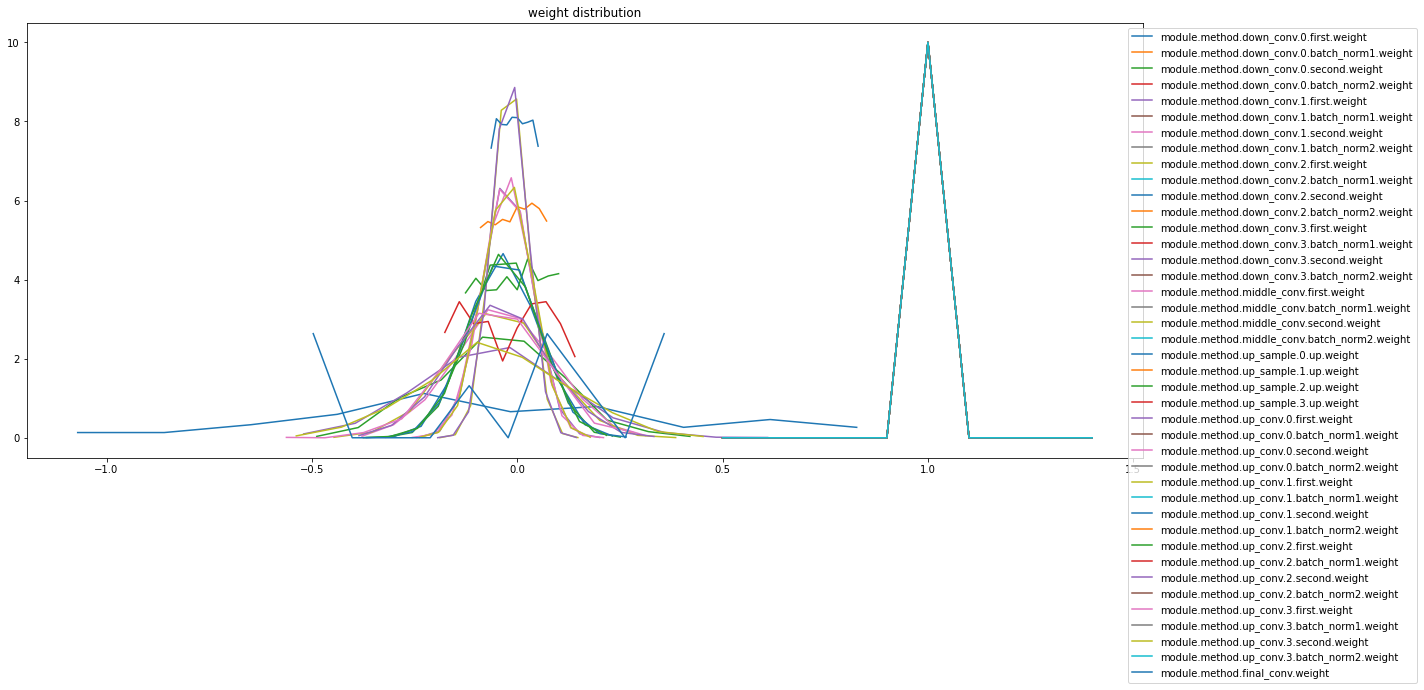

In [83]:
plt.figure( figsize = (20, 8) )
for i, (name, param) in enumerate(model_named_parameters):
    if grad is None: continue
    
    # Skip biases...
    if "bias" in name: continue
    
    print('layer %02d (%-40s): mean %+e, std %e' % (i, name[name.find(".")+1:], param.mean(), param.std()))
    
    hy, hx = np.histogram(param.cpu().detach().numpy(), density = True)
    plt.plot(hx[:-1], hy, label = name)
plt.legend(bbox_to_anchor=(1.25, 1.00));
plt.title('weight distribution');

In [58]:
model_named_gradients = train_state_dict['model_named_gradients']

In [ ]:
plt.figure( figsize = (20, 8) )
for i, (name, grad) in enumerate(model_named_gradients):
    if grad is None: continue
    
    # Skip biases...
    if "bias" in name: continue
    
    print('layer %02d (%-40s): mean %+e, std %e' % (i, name[name.find(".")+1:], grad.mean(), grad.std()))
    
    hy, hx = np.histogram(grad.cpu().detach().numpy(), density = True)
    plt.plot(hx[:-1], hy, label = name)
plt.xlim(-1e-3, 1e-3)
plt.legend(bbox_to_anchor=(1.25, 1.00));
plt.title('weight distribution');

layer 00 (method.down_conv.0.first.weight         ): mean -4.145459e-03, std 9.956285e-03
layer 04 (method.down_conv.0.second.weight        ): mean +5.375092e-03, std 2.062552e-02
layer 08 (method.down_conv.1.first.weight         ): mean -1.651571e-05, std 1.152550e-03
layer 12 (method.down_conv.1.second.weight        ): mean -3.863242e-05, std 8.155141e-04
layer 16 (method.down_conv.2.first.weight         ): mean -2.666876e-05, std 2.044730e-04
layer 20 (method.down_conv.2.second.weight        ): mean -3.047547e-05, std 2.716466e-04
layer 24 (method.down_conv.3.first.weight         ): mean -4.445465e-06, std 2.604077e-05
layer 28 (method.down_conv.3.second.weight        ): mean -1.470996e-06, std 3.087664e-05
layer 32 (method.middle_conv.first.weight         ): mean -1.126867e-06, std 5.836999e-06
layer 36 (method.middle_conv.second.weight        ): mean -6.753819e-07, std 5.790982e-06
layer 40 (method.up_sample.0.up.weight            ): mean +3.619579e-07, std 1.429473e-05
layer 42 (